In [102]:
import sys 

assert sys.version_info >= (3,7)

In [103]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

In [104]:
import matplotlib.pyplot as plt

plt.rc('font', size=12)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [105]:
import numpy as np

np.random.seed(42)

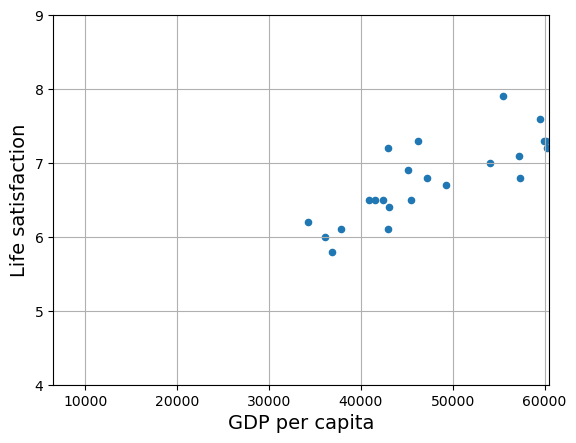

[[6.30477494]]


In [106]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

lifesat = pd.read_csv("datasets/lifesat/lifesat.csv")
X = lifesat[["GDP per capita"]].values
y = lifesat[["Life satisfaction"]].values

lifesat.plot(kind='scatter', grid=True, 
             x = "GDP per capita", y="Life satisfaction")
plt.axis([6_500, 60_500, 4, 9])
plt.show()

model = LinearRegression()

model.fit(X, y)

X_new = [[37_655.2]]
print(model.predict(X_new))

In [107]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors=3)

model.fit(X, y)

print(model.predict(X_new))

[[5.96666667]]


In [108]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "fundamental"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"

    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [109]:
datapath = Path() / "datasets" / "lifesat"

oecd_bli = pd.read_csv(datapath / "oecd_bli.csv")
gdp_per_capita = pd.read_csv(datapath / "gdp_per_capita.csv")

In [110]:
gdp_per_capita.columns

Index(['Entity', 'Code', 'Year', 'GDP per capita',
       'World region according to OWID'],
      dtype='object')

In [111]:
gdp_year = 2020
gdppc_col = "GDP per capita"
lifesat_col = "Life satisfaction"

gdp_per_capita = gdp_per_capita[gdp_per_capita["Year"] == gdp_year]
gdp_per_capita = gdp_per_capita.drop(["Code", "Year", "World region according to OWID"], axis=1)
gdp_per_capita.columns = ["Country", gdppc_col]
gdp_per_capita.set_index("Country", inplace=True)

gdp_per_capita.head()

,GDP per capita
Country,
Afghanistan,2769.6858
Albania,15659.5890
Algeria,14194.1550
Andorra,55488.4920
Angola,8960.3380


In [112]:
oecd_bli.columns

Index(['Country', 'GDP per capita (USD)',
       '  Dwellings without basic facilities', '  Housing expenditure',
       '  Rooms per person', '  Household net adjusted disposable income',
       '  Household net wealth', '  Labour market insecurity',
       '  Employment rate', '  Long-term unemployment rate',
       '  Personal earnings', '  Quality of support network',
       '  Educational attainment', '  Student skills', '  Years in education',
       '  Air pollution', '  Water quality',
       '  Stakeholder engagement for developing regulations',
       '  Voter turnout', '  Life expectancy', '  Self-reported health',
       '  Feeling safe walking alone at night', '  Homicide rate',
       '  Employees working very long hours',
       '  Time devoted to leisure and personal care', '  Life satisfaction'],
      dtype='object')

In [113]:
oecd_bli.set_index("Country", inplace=True)
oecd_bli["Life satisfaction"] = oecd_bli["  Life satisfaction"]
oecd_bli.head()

,GDP per capita (USD),Dwellings without basic facilities,Housing expenditure,Rooms per person,Household net adjusted disposable income,Household net wealth,Labour market insecurity,Employment rate,Long-term unemployment rate,Personal earnings,...,Stakeholder engagement for developing regulations,Voter turnout,Life expectancy,Self-reported health,Feeling safe walking alone at night,Homicide rate,Employees working very long hours,Time devoted to leisure and personal care,Life satisfaction,Life satisfaction
Country,,,,,,,,,,,,,,,,,,,,,
Australia,66589,NaN,19.4,NaN,37433.0,528768.0,3.1,73,1.0,55206.0,...,2.7,92,83.0,85,67,0.9,12.5,14.36,7.1,7.1
Austria,59225,0.8,20.8,1.6,37001.0,309637.0,2.3,72,1.3,53132.0,...,1.3,76,82.0,71,86,0.5,5.3,14.51,7.2,7.2
Belgium,55536,0.7,20.0,2.1,34884.0,447607.0,2.4,65,2.3,54327.0,...,2.0,88,82.1,74,56,1.1,4.3,15.52,6.8,6.8
Canada,54866,0.2,22.9,2.6,34421.0,478240.0,3.8,70,0.5,55342.0,...,2.9,68,82.1,89,78,1.2,3.3,14.57,7.0,7.0
Chile,16616,9.4,18.4,1.9,NaN,135787.0,7.0,56,NaN,26729.0,...,1.3,47,80.6,60,41,2.4,7.7,NaN,6.2,6.2


In [114]:
full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                              left_index=True, right_index=True)

full_country_stats.sort_values(by=gdppc_col, inplace=True)


full_country_stats = full_country_stats[[gdppc_col, lifesat_col]]

full_country_stats.head()

,GDP per capita,Life satisfaction
Country,,
Colombia,15861.500,5.7
Mexico,19728.482,6.0
Costa Rica,22211.861,6.3
Chile,26248.562,6.2
Greece,30487.113,5.8


In [120]:
min_gdp = 27_500
max_gdp = 70_500

country_stats = full_country_stats[(full_country_stats[gdppc_col] >= min_gdp) &
                                   (full_country_stats[gdppc_col] <= max_gdp)]
country_stats.head()

,GDP per capita,Life satisfaction
Country,,
Greece,30487.113,5.8
Latvia,34225.900,6.2
Hungary,36119.520,6.0
Portugal,36852.230,5.8
Poland,37852.800,6.1


In [121]:
country_stats.to_csv(datapath / "lifesat.csv")
full_country_stats.to_csv(datapath / "lifesat_full.csv")

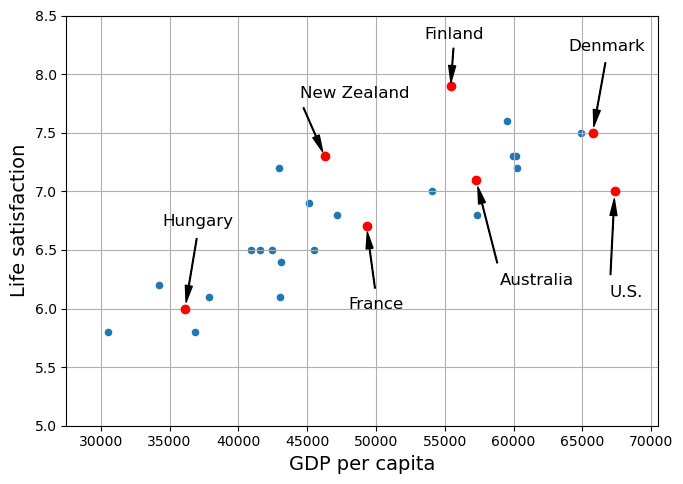

In [147]:
country_stats.plot(kind='scatter', figsize=(7,5), grid=True,
                   x=gdppc_col, y=lifesat_col)

min_life_sat = 5
max_life_sat = 8.5

position_text = {
    "Hungary": (34500, 6.7),          
    "France": (48000, 6.0),           
    "New Zealand": (44500, 7.8),      
    "Australia": (59000, 6.2),        
    "United States": (67000, 6.1),    
    "Denmark": (64000, 8.2),         
    "Finland": (53500, 8.3)           
}

for country, pos_text in position_text.items():
    pos_data_x = country_stats[gdppc_col].loc[country]
    pos_data_y = country_stats[lifesat_col].loc[country]
    country = "U.S." if country == "United States" else country
    plt.annotate(country, xy=(pos_data_x, pos_data_y),
                 xytext=pos_text, fontsize=12,
                 arrowprops=dict(facecolor="black", width=0.5,
                                 shrink=0.08, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "ro")

plt.axis([min_gdp, max_gdp, min_life_sat, max_life_sat])

save_fig("money_happy_scatterplot")
plt.show()

In [126]:
highlighted_countries = country_stats.loc[list(position_text.keys())]
highlighted_countries[[gdppc_col, lifesat_col]].sort_values(by=gdppc_col)

,GDP per capita,Life satisfaction
Country,,
Hungary,36119.520,6.0
New Zealand,46266.395,7.3
France,49311.332,6.7
Finland,55424.860,7.9
Australia,57260.465,7.1
Denmark,65744.440,7.5
United States,67342.070,7.0


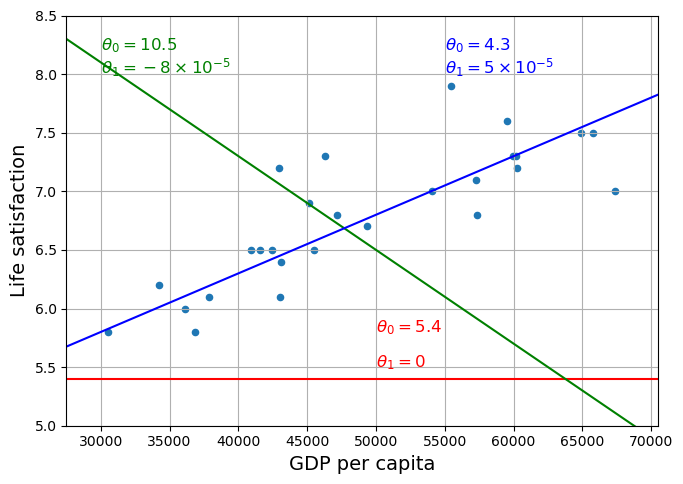

In [175]:
country_stats.plot(kind='scatter', figsize=(7,5), grid=True,
                   x=gdppc_col, y=lifesat_col)

X = np.linspace(min_gdp, max_gdp, 1000)

w1, w2 = 5.4, 0
plt.plot(X, w1 + w2 * 1e-5 * X, "r")
plt.text(50_000, 5.8, fr"$\theta_0 = {w1}$", color="r")
plt.text(50_000, 5.5, fr"$\theta_1 = {w2}$", color="r")

w1, w2 = 10.5, -8
plt.plot(X, w1 + w2 * 1e-5 * X, "g")
plt.text(30_000, 8.2, fr"$\theta_0 = {w1}$", color="g")
plt.text(30_000, 8.0, fr"$\theta_1 = {w2} \times 10^{{-5}}$", color="g")

w1, w2 = 4.3, 5
plt.plot(X, w1 + w2 * 1e-5 * X, "b")
plt.text(55_000, 8.2, fr"$\theta_0 = {w1}$", color="b")
plt.text(55_000, 8.0, fr"$\theta_1 = {w2} \times 10^{{-5}}$", color="b")

plt.axis([min_gdp, max_gdp, min_life_sat, max_life_sat])

save_fig('tweaking_model_params_plot')
plt.show()

In [182]:
from sklearn import linear_model

X_sample = country_stats[(gdppc_col)].values
y_sample = country_stats[(lifesat_col)].values

lin1 = linear_model.LinearRegression()
lin1.fit(X_sample.reshape(-1, 1), y_sample.reshape(-1, 1))

t0, t1 = lin1.intercept_[0], lin1.coef_.ravel()[0]
print(f"00={t0:.2f}, 01={t1:.2e}")


00=4.59, 01=4.49e-05


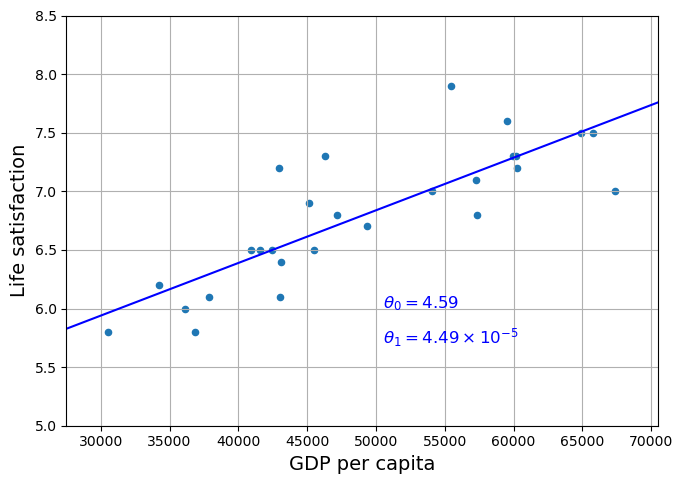

In [187]:
country_stats.plot(kind='scatter', figsize=(7,5), grid=True,
                   x=gdppc_col, y=lifesat_col)

X = np.linspace(min_gdp, max_gdp, 1000)
plt.plot(X, t0 + t1 * X, "b")

plt.text(max_gdp - 20_000, min_life_sat + 1,
         fr"$\theta_0 = {t0:.2f}$", color="b")
plt.text(max_gdp - 20_000, min_life_sat + 0.7,
         fr"$\theta_1 = {t1 * 1e5:.2f} \times 10^{{-5}}$", color="b")

plt.axis([min_gdp, max_gdp, min_life_sat, max_life_sat])

save_fig('best_fit_model_plot')
plt.show()


In [188]:
cyprus_gdp_per_capita = gdp_per_capita[gdppc_col].loc["Cyprus"]
cyprus_gdp_per_capita

41297.48

In [191]:
cyprus_predicted_life_satisfaction = lin1.predict([[cyprus_gdp_per_capita]])[0,0]
cyprus_predicted_life_satisfaction

6.447114662058714

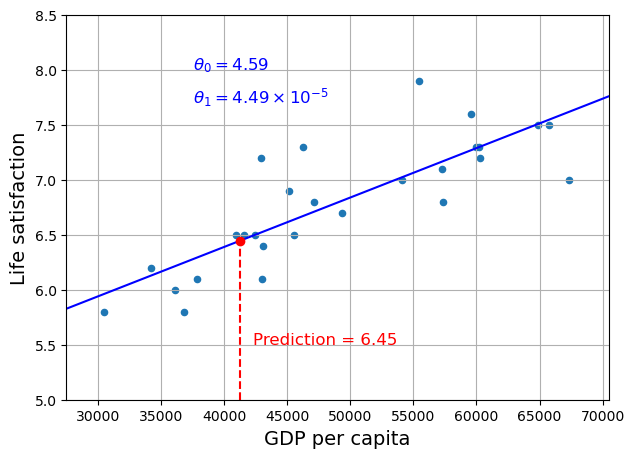

In [204]:
country_stats.plot(kind="scatter", figsize=(7,5), grid=True,
                   x=gdppc_col, y=lifesat_col)

X = np.linspace(min_gdp, max_gdp, 1000)
plt.plot(X, t0 + t1 * X, "b")

plt.text(min_gdp + 10_000, max_life_sat - 0.5,
         fr"$\theta_0 = {t0:.2f}$", color="b")
plt.text(min_gdp + 10_000, max_life_sat - 0.8,
         fr"$\theta_1 = {t1 * 1e5:.2f} \times 10^{{-5}}$", color="b")

plt.plot([cyprus_gdp_per_capita, cyprus_gdp_per_capita],
         [min_life_sat, cyprus_predicted_life_satisfaction], "r--")

plt.text(cyprus_gdp_per_capita + 1000, 5.5,
         fr"Prediction = {cyprus_predicted_life_satisfaction:.2f}", color="r")

plt.plot(cyprus_gdp_per_capita, cyprus_predicted_life_satisfaction, "ro")

plt.axis([min_gdp, max_gdp, min_life_sat, max_life_sat])

plt.show()

In [205]:
missing_data = full_country_stats[(full_country_stats[gdppc_col] < min_gdp) |
                                  (full_country_stats[gdppc_col] > max_gdp)]

missing_data

,GDP per capita,Life satisfaction
Country,,
Colombia,15861.500,5.7
Mexico,19728.482,6.0
Costa Rica,22211.861,6.3
Chile,26248.562,6.2
Switzerland,77324.890,7.5
Norway,86096.055,7.3
Ireland,101968.555,7.0
Luxembourg,129865.630,7.4


In [267]:
position_text_missing_countries = {
    "Colombia": (25000, 5.5),        
    "Mexico": (13000, 6.7),          
    "Costa Rica": (22500, 7.5),      
    "Chile": (26500, 7.1),           
    "Switzerland": (74500, 6.5),     
    "Norway": (83000, 8),          
    "Ireland": (98000, 6.0),        
    "Luxembourg": (100000, 7.4)      
}

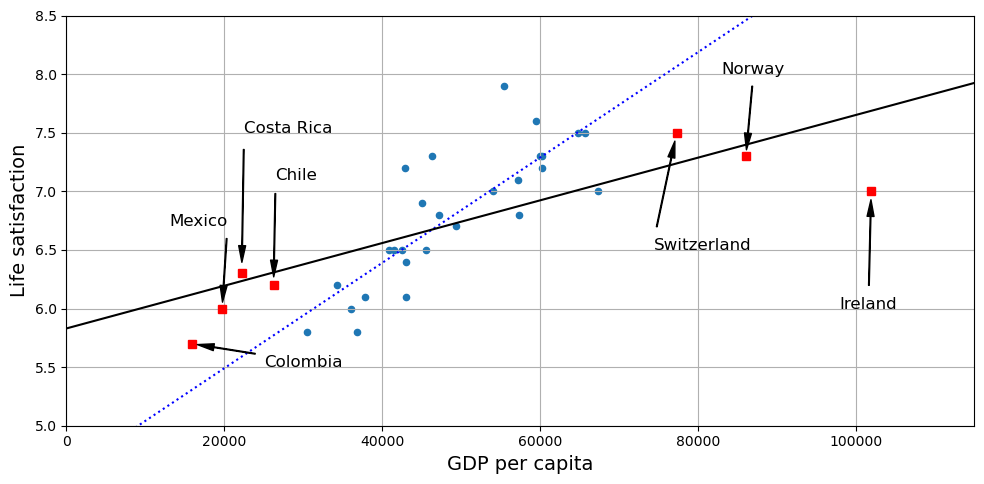

In [268]:
full_country_stats.plot(kind='scatter', figsize=(10,5),
                        x=gdppc_col, y=lifesat_col, grid=True)

for country, pos_text in position_text_missing_countries.items():
    pos_data_x, pos_data_y = missing_data.loc[country]
    plt.annotate(country, xy=(pos_data_x, pos_data_y),
                 xytext=pos_text, fontsize=12,
                 arrowprops=dict(facecolor='black', width=0.5,
                                 shrink=0.08, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "rs")

X = np.linspace(0, 115_000, 1000)
plt.plot(X, t0 + t1 * X, "b:")

lin_reg_full = linear_model.LinearRegression()
Xfull = np.c_[full_country_stats[gdppc_col]]
yfull = np.c_[full_country_stats[lifesat_col]]
lin_reg_full.fit(Xfull, yfull)

t0full, t1full = lin_reg_full.intercept_[0], lin_reg_full.coef_.ravel()[0]
X = np.linspace(0, 115_000, 1000)
plt.plot(X, t0full + t1full * X, "k")

plt.axis([0, 115_000, min_life_sat, max_life_sat])

save_fig('representative_training_data_scatterplot')
plt.show()



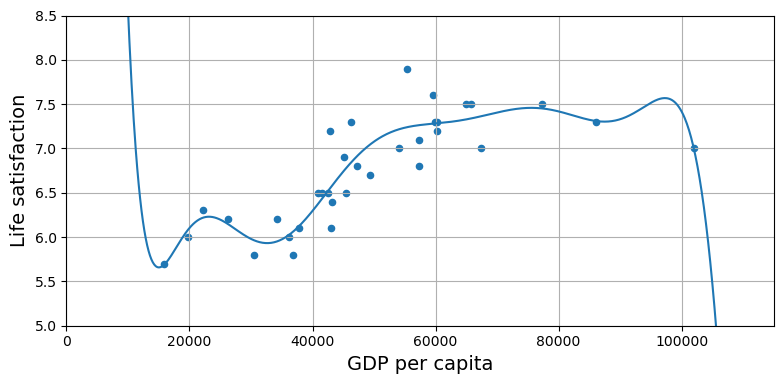

In [269]:
from sklearn import preprocessing
from sklearn import pipeline

full_country_stats.plot(kind='scatter', figsize=(8,4),
                        x=gdppc_col, y=lifesat_col, grid=True)

poly = preprocessing.PolynomialFeatures(degree=10, include_bias=False)
scaler = preprocessing.StandardScaler()
lin_reg2 = linear_model.LinearRegression()

pipeline_reg = pipeline.Pipeline([
    ('poly', poly),
    ('scal', scaler),
    ('lin', lin_reg2)
])

pipeline_reg.fit(Xfull, yfull)

curve = pipeline_reg.predict(X[:, np.newaxis])
plt.plot(X, curve)

plt.axis([0, 115_000, min_life_sat, max_life_sat])

save_fig('overfitting_model_plot')
plt.show()

In [270]:
w_countries = [c for c in full_country_stats.index if "W" in c.upper()]
full_country_stats.loc[w_countries][lifesat_col]

Country
New Zealand    7.3
Sweden         7.3
Switzerland    7.5
Norway         7.3
Name: Life satisfaction, dtype: float64

In [271]:
all_w_countries = [c for c in gdp_per_capita.index if "W" in c.upper()]
gdp_per_capita.loc[all_w_countries].sort_values(by=gdppc_col)

,GDP per capita
Country,
Malawi,1656.4398
Low-income countries,2347.0789
Rwanda,2520.3174
Papua New Guinea,4077.6313
Zimbabwe,4527.7197
Sub-Saharan Africa (WB),4674.7300
South Asia (WB),7399.2150
Lower-middle-income countries,7439.8076
Eswatini,9695.8250


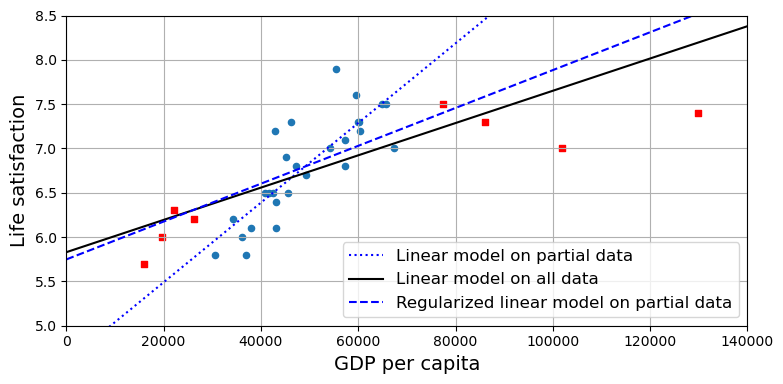

In [284]:
country_stats.plot(kind='scatter', x=gdppc_col, y=lifesat_col, figsize=(8, 4))
missing_data.plot(kind='scatter', x=gdppc_col, y=lifesat_col,
                  marker="s", color="r", grid=True, ax=plt.gca())

X = np.linspace(0, 140_000, 1000)
plt.plot(X, t0 + t1*X, "b:", label="Linear model on partial data")
plt.plot(X, t0full + t1full * X, "k-", label="Linear model on all data")

ridge = linear_model.Ridge(alpha=10**9.5)
X_sample = country_stats[[gdppc_col]]
y_sample = country_stats[[lifesat_col]]
ridge.fit(X_sample, y_sample)
t0ridge, t1ridge = ridge.intercept_[0], ridge.coef_.ravel()[0]
plt.plot(X, t0ridge + t1ridge * X, "b--",
         label="Regularized linear model on partial data")

plt.legend(loc="lower right")

plt.axis([0, 140_000, min_life_sat, max_life_sat])

save_fig('ridge_model_plot')
plt.show()